# Import python packages

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from src.data import make_dataset
from src import metrics
from src import data_generator

#%load_ext autoreload # Load the "autoreload" extension so that code can change
#%autoreload 2 # always reload modules so that as you change code in src, it gets loaded

2024-03-04 15:27:42.343915: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 15:27:42.507357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 15:27:42.507489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 15:27:42.512341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 15:27:42.535250: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 15:27:42.536930: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Original image and its corresponding mask

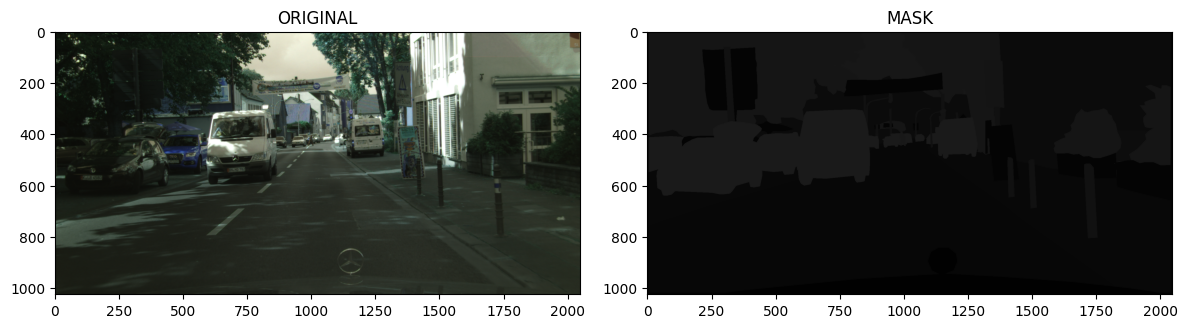

In [2]:
ORIGINAL_IMAGE_FOLDER = "/home/hao/repositories/design-autonomous-car/data/raw/leftImg8bit/train/cologne/"
MASK_IMAGE_FOLDER = "/home/hao/repositories/design-autonomous-car/data/raw/gtFine/train/cologne/"

ORIGINAL_IMAGE_NAME = "cologne_000000_000019_leftImg8bit.png"
MASK_IMAGE_NAME = "cologne_000000_000019_gtFine_labelIds.png"

ORIGINAL_IMAGE_PATH = os.path.join(ORIGINAL_IMAGE_FOLDER, ORIGINAL_IMAGE_NAME)
MASK_IMAGE_PATH = os.path.join(MASK_IMAGE_FOLDER, MASK_IMAGE_NAME)

# Loading image templates
ORIGINAL_IMAGE = cv2.imread(ORIGINAL_IMAGE_PATH)
MASK_IMAGE = cv2.imread(MASK_IMAGE_PATH)

# Plot and save image templates
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ORIGINAL_IMAGE)
plt.title('ORIGINAL')

plt.subplot(1, 2, 2)
plt.imshow(MASK_IMAGE)
plt.title('MASK')

plt.tight_layout()
plt.savefig("./../reports/original_vs_mask.png")
plt.show()

In [3]:
dim_image = ORIGINAL_IMAGE.shape
dim_mask = MASK_IMAGE.shape

print("The images and masks have the following dimensions:", dim_image)

The images and masks have the following dimensions: (1024, 2048, 3)


# Dataset creation

In [4]:
dataset_path = "/home/hao/repositories/design-autonomous-car/data/processed/dataset/"
raw_images_path = "/home/hao/repositories/design-autonomous-car/data/raw/leftImg8bit/"
raw_masks_path = "/home/hao/repositories/design-autonomous-car/data/raw/gtFine/"

# source folders
raw_train_images = raw_images_path + "train/"
raw_val_images = raw_images_path + "val/"
raw_test_images = raw_images_path + "test/"
raw_train_masks = raw_masks_path + "train/"
raw_val_masks = raw_masks_path + "val/"
raw_test_masks = raw_masks_path + "test/"

# destination folders
train_images = dataset_path + "train_images/"
train_masks = dataset_path + "train_masks/"
val_images = dataset_path + "val_images/"
val_masks = dataset_path + "val_masks/"
test_images = dataset_path + "test_images/"
test_masks = dataset_path + "test_masks/"

In [ ]:
# Copy png files from source to destination 
make_dataset.copy_images(raw_train_images, train_images)
make_dataset.copy_images(raw_val_images, val_images)
make_dataset.copy_images(raw_test_images, test_images)
make_dataset.copy_images(raw_train_masks, train_masks)
make_dataset.copy_images(raw_val_masks, val_masks)
make_dataset.copy_images(raw_test_masks, test_masks)

In [4]:
# Keep only mask images 
make_dataset.keep_only_masks(dataset_path)

In [5]:
# Rename filename so that images and masks can match
make_dataset.rename_files(dataset_path)

In [16]:
# Keep only 20% of the dataset to save computer resources
#make_dataset.reduce_number_of_files(train_images, train_masks, 0.2)
#make_dataset.reduce_number_of_files(test_images, test_masks, 0.2)
#make_dataset.reduce_number_of_files(val_images, val_masks, 0.2)